In [1]:
import numpy as np
import cupy as cp
from numba import jit, prange
import timeit
import matplotlib.pyplot as plt

In [2]:
def scale_base(a, b):
    res = a * b
    
def scale_cp(a, b):
    res = a * b
    
@jit(nopython=True, parallel=True)
def scale_nb(a, b):
    res = np.multiply(a,b)

In [3]:
N = [int(8*(2**0.5)**i) for i in range(28)]
methods = ["scale_base", "scale_cp", "scale_nb"]
K = len(methods)
funcs = [scale_base, scale_cp, scale_nb]
masks = [1, 1, 1]
groups = [0, 0, 0]
T = [[] for i in range(K)]
for n in N:
    print("Start with size:", n)
    a = np.random.rand(n)
    b = np.random.rand()
    ca = cp.array(a)
    cb = cp.array(b)
    
    args = [(a, b), (ca, cb), (a,b)]
    
    for i in range(K):
        t = %timeit -q -n 1 -r 3 -o funcs[i](*args[i])
        T[i].append(t.average*1000)

Start with size: 8
Start with size: 11
Start with size: 16
Start with size: 22
Start with size: 32
Start with size: 45
Start with size: 64
Start with size: 90
Start with size: 128
Start with size: 181
Start with size: 256
Start with size: 362
Start with size: 512
Start with size: 724
Start with size: 1024
Start with size: 1448
Start with size: 2048
Start with size: 2896
Start with size: 4096
Start with size: 5792
Start with size: 8192
Start with size: 11585
Start with size: 16384
Start with size: 23170
Start with size: 32768
Start with size: 46340
Start with size: 65536
Start with size: 92681


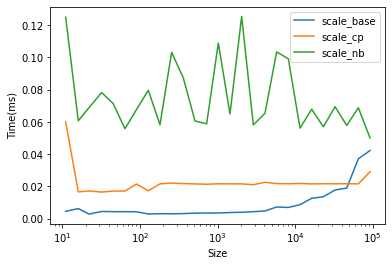

In [4]:
n_groups = max(groups)+1
fig, axs = plt.subplots(n_groups)
plt.rcParams["figure.figsize"] = (10,15)
if n_groups == 1:
    for i in range(K):
        if masks[i]:
            axs.plot(N[1:], T[i][1:], label=methods[i])
    axs.set_xlabel("Size")
    axs.set_ylabel("Time(ms)")
    axs.legend()
    axs.set_xscale('log')
else:
    for g in range(n_groups):
        for i in range(K):
            if masks[i] and groups[i] == g:
                axs[g].plot(N[1:], T[i][1:], label=methods[i])
        axs[g].set_xlabel("Size")
        axs[g].set_ylabel("Time(ms)")
        axs[g].legend()
        axs[g].set_xscale('log')
plt.show()